In [0]:
#necessary imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [0]:
import glob
import cv2

#Import training data and labels

filenames = glob.glob("/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/*.tif")
filenames.sort()

images = []
for img in filenames:
    n = cv2.imread(img)
    images.append(n)
print ('>loaded %s' % filenames)

filenames_labels = glob.glob("/content/drive/My Drive/Colab Notebooks/Project/Project Data/Labels/*.tif")
filenames_labels.sort()

images_labels = []
for img_labels in filenames_labels:
    n_labels = cv2.imread(img_labels)
    images_labels.append(n_labels)
print ('>loaded %s' % filenames_labels)    

x_train = tf.stack(images)
y_train = tf.stack(images_labels)

x_train = x_train/255
y_train = y_train/255 

#print(x_train.shape, y_train.shape)

x_train = tf.cast(x_train, np.float32)
y_train = tf.cast(y_train, np.float32)

x_train = x_train[:, 0:512, 0:512, :]
y_train = y_train[:, 0:512, 0:512, :]

y_train = y_train[:,:,:,0]
#print(y_train.shape)

y_train = y_train[..., None]
#print(y_train.shape)
print(x_train.shape, y_train.shape)

>loaded ['/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_43_9.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_46_14.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_a_56_1.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_1_7.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_1_8.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_20_1.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_20_10.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_20_18.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_21_12.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_21_3.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Images/aria_c_22_1.tif', '/content/drive/My Drive/Colab N

In [0]:
#Now import test data and labels

filenames_ti = glob.glob("/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/*.tif")
filenames_ti.sort()

images_ti = []
for img_ti in filenames_ti:
    n_ti = cv2.imread(img_ti)
    images_ti.append(n_ti)
print ('>loaded %s' % filenames_ti)

filenames_labels_ti = glob.glob("/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Labels/*.tif")
filenames_labels_ti.sort()

images_labels_ti = []
for img_labels_ti in filenames_labels_ti:
    n_labels_ti = cv2.imread(img_labels_ti)
    images_labels_ti.append(n_labels_ti)
print ('>loaded %s' % filenames_labels_ti)    

x_test = tf.stack(images_ti)
y_test = tf.stack(images_labels_ti)

x_test = x_test/255
y_test = y_test/255 

#print(x_train.shape, y_train.shape)

x_test = tf.cast(x_test, np.float32)
y_test = tf.cast(y_test, np.float32)

x_test = x_test[:, 0:512, 0:512, :]
y_test = y_test[:, 0:512, 0:512, :]

y_test = y_test[:,:,:,0]
#print(y_train.shape)

y_test = y_test[..., None]
#print(y_train.shape)
print(x_test.shape, y_test.shape)

>loaded ['/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_10_10.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_10_27.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_11_30.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_11_6.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_12_15.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_12_34.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_13_2.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_13_22.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_14_11.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/Test Images/aria_a_14_19.tif', '/content/drive/My Drive/Colab Notebooks/Project/Project Data/T

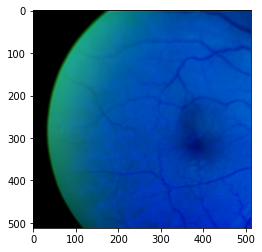

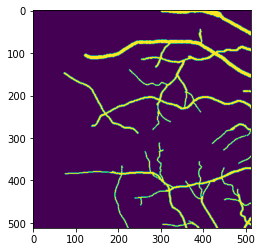

In [0]:
#Check to see if the data loaded correctly

train_data_plot = tf.squeeze(x_train[1])
plt.imshow(train_data_plot)

plt.show()

train_label_plot = tf.squeeze(y_train[1])
plt.imshow(train_label_plot)

plt.show()

In [0]:
class UNet(tf.keras.models.Model):
  def __init__(self):
    super().__init__()

    self.layer1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer2 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.layer3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer4 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
    self.layer5 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer6 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    self.layer7 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer8 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.pool4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))
    self.layer9 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer10 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv1 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout1 = tf.keras.layers.Dropout(0.1) 
    self.layer11 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer12 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout2 = tf.keras.layers.Dropout(0.1)
    self.layer13 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer14 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv3 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size = 3, strides=2, padding='same', activation = 'relu')
    self.dropout3 = tf.keras.layers.Dropout(0.1)
    self.layer15 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer16 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
    self.transposeconv4 = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same', activation = 'relu')
    self.dropout4 = tf.keras.layers.Dropout(0.1)
    self.layer17 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')
    self.layer18 = tf.keras.layers.Conv2D(filters=16,kernel_size=3, strides=1, padding='same', activation='relu') 
    self.layer19 = tf.keras.layers.Conv2D(filters=1, kernel_size=1, strides=1, padding='same', activation='sigmoid')#changed from linear to sigmoid 
  
  def call(self, input):  
    x1 = self.layer1(input)
    #print('input', input.shape)
    x2 = self.layer2(x1)
    #print('x1', x1.shape)
    p1 = self.pool1(x2)
    #print('x2', x2.shape)
    x3 = self.layer3(p1)
    #print('p1', p1.shape) 
    x4 = self.layer4(x3)
    #print('x3', x3.shape)
    p2 = self.pool2(x4)
    #print('x4', x4.shape)
    x5 = self.layer5(p2)
    #print('p2', p2.shape)
    x6 = self.layer6(x5)
    #print('x5', x5.shape)
    p3 = self.pool3(x6)
    #print('x6', x6.shape)
    x7 = self.layer7(p3)
    #print('p3', p3.shape)
    x8 = self.layer8(x7)
    #print('x7', x7.shape)
    p4 = self.pool4(x8)
    #print('x8', x8.shape)
    x9 = self.layer9(p4)
    #print('p4', p4.shape)
    x10 = self.layer10(x9)
    #print('x9', x9.shape)
    t1 = self.transposeconv1(x10)
    #print('t1', t1.shape)
    #print('x10', x10.shape)
    s1 = tf.keras.layers.Concatenate(axis=-1)([t1, x8])
    #print('s1', s1.shape)
    d1 = self.dropout1(s1)
    #print('d1', d1.shape)
    x11 = self.layer11(d1)
    x12 = self.layer12(x11)
    #print('x11', x11.shape)
    t2 = self.transposeconv2(x12)
    #print('x12', x12.shape)
    #print('t2', t2.shape)
    s2 = tf.keras.layers.Concatenate(axis=-1)([t2, x6]) 
    #print('s2', s2.shape)
    d2 = self.dropout2(s2)
    x13 = self.layer13(d2)
    #print('d2', d2.shape)
    x14 = self.layer14(x13)
    #print('x13', x13.shape)
    t3 = self.transposeconv3(x14)
    #print('x14', x14.shape)
    #print('t3', t3.shape)
    s3 = tf.keras.layers.Concatenate(axis=-1)([t3, x4])
    #print('s3', s3.shape)
    d3 = self.dropout3(s3)
    x15 = self.layer15(d3)
    #print('d3', d3.shape)
    x16 = self.layer16(x15)
    #print('x15', x15.shape)
    t4 = self.transposeconv4(x16)
    #print('x16', x16.shape)
    s4 = tf.keras.layers.Concatenate(axis=-1)([t4, x2])
    #print('s4', s4.shape)
    d4 = self.dropout4(s4)
    #print('t4', t4.shape)
    x17 = self.layer17(d4)
    #print('d4', d4.shape)
    x18 = self.layer18(x17)
    #print('x17', x17.shape)
    x19 = self.layer19(x18)
    #print('x18', x18.shape)
    #print('x19', x19.shape)

    return self.layer19(x18)

model = UNet()

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
mask = tf.Variable(initial_value = tf.constant( 1.0, shape=[512,512]), trainable = True, constraint=tf.keras.constraints.NonNeg())
print(mask.shape)
print(mask)
plt.imshow(mask)

(512, 512)
<tf.Variable 'Variable:0' shape=(512, 512) dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>


In [0]:
def physical_layer(x_batch,mask):
  #,input_illumination_phase,circ_aper,aperture_phase  
  # x_batch is a batch of phase-only objects that we created earlier;
  # propagate the field emerging from these objects to the Fourier plane, apply
  # your aperture mask (circular aperture and phase), then propagate it to the
  # image plane;
    input1=x_batch[:, :, :, 0] 
    
    output1=tf.math.multiply(input1,mask)
    
    #add noise
    shape = tf.shape(
    input1,
    out_type=tf.dtypes.int32,
    name=None)
    gaussian=tf.random.normal(shape, stddev=0.2)
    #image=tf.abs(output1)+gaussian ###WE HAVE TO ADD THE GAUSSIAN NOISE
    image=((tf.abs(output1))**2)+0*gaussian  #FOR QUESTION 2 a

    
  # if you didn't already, add color channel singleton dimension in preparation
  # for processing through a CNN:
    image = image[..., tf.newaxis]
    
    
    return image-1

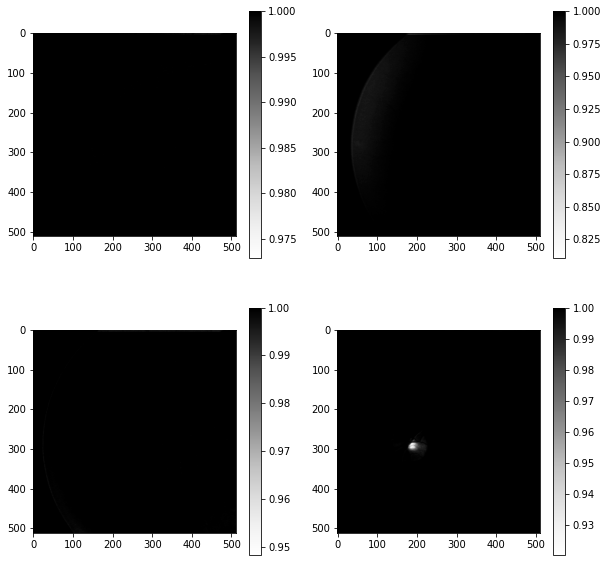

In [0]:
def plot_examples(batch):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(abs(batch[i, :, :, 0]),cmap='Greys')
        plt.colorbar()
        plt.axis('on')
    plt.show()

plot_examples(physical_layer(x_train[:4],mask).numpy())

In [0]:
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.MeanIoU(num_classes=2, name='train_IoU')

test_loss =  tf.keras.metrics.Mean(name='test_loss')
test_acc = tf.keras.metrics.MeanIoU(num_classes=2, name='test_IoU')

In [0]:
def forward_model(x_batch,mask):
    p_layer_out = physical_layer(x_batch, mask)
    return model(p_layer_out)


In [0]:
@tf.function 
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = forward_model(images, mask)
        loss = loss_object(labels, predictions)
        sources = model.trainable_variables
        sources.append(mask)
        
    gradients = tape.gradient(loss, sources)
    optimizer.apply_gradients(zip(gradients, sources))

    train_loss(loss)
    train_acc(labels, predictions)

@tf.function
def test_step(images, labels):
    predictions = forward_model(images, mask)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_acc(labels, predictions)

In [0]:
h_train = np.zeros(10)
h_test = np.zeros(10)

In [0]:
EPOCHS=10
for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(images, labels)
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
    
    template='Epoch {}, Loss{}, MeanIoU {}, Test loss {}, Test MeanIoU {}'
    print(template.format(epoch+1,
                         train_loss.result(), 
                         train_acc.result()*100,
                         test_loss.result(),
                         test_acc.result()*100))
    h_train[epoch] = train_acc.result()
    h_test[epoch] = test_acc.result()
    train_loss.reset_states()
    train_acc.reset_states()
    test_loss.reset_states()
    test_acc.reset_states()

In [0]:
print(mask)

<tf.Variable 'Variable:0' shape=(512, 512) dtype=float32, numpy=
array([[0.9998509 , 0.99982625, 0.99975324, ..., 0.99941397, 0.99934196,
        0.9992844 ],
       [0.999738  , 0.9997175 , 0.9994807 , ..., 0.9989847 , 0.9987377 ,
        0.99880016],
       [0.9998229 , 0.99979204, 0.9995165 , ..., 0.9993597 , 0.9993369 ,
        0.9991903 ],
       ...,
       [0.9997699 , 0.999762  , 0.99949867, ..., 0.9991839 , 0.99891055,
        0.9987978 ],
       [0.9998071 , 0.99969804, 0.9994179 , ..., 0.99925464, 0.99894506,
        0.998933  ],
       [0.9998436 , 0.9997292 , 0.99963766, ..., 0.99937415, 0.99928814,
        0.99936277]], dtype=float32)>


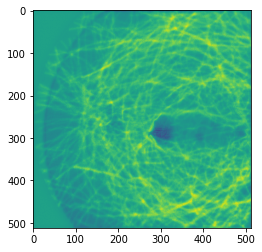

In [0]:
plt.imshow(mask.numpy())

<tf.Variable 'Variable:0' shape=(512, 512) dtype=float32, numpy=
array([[0.9998509 , 0.99982625, 0.99975324, ..., 0.99941397, 0.99934196,
        0.9992844 ],
       [0.999738  , 0.9997175 , 0.9994807 , ..., 0.9989847 , 0.9987377 ,
        0.99880016],
       [0.9998229 , 0.99979204, 0.9995165 , ..., 0.9993597 , 0.9993369 ,
        0.9991903 ],
       ...,
       [0.9997699 , 0.999762  , 0.99949867, ..., 0.9991839 , 0.99891055,
        0.9987978 ],
       [0.9998071 , 0.99969804, 0.9994179 , ..., 0.99925464, 0.99894506,
        0.998933  ],
       [0.9998436 , 0.9997292 , 0.99963766, ..., 0.99937415, 0.99928814,
        0.99936277]], dtype=float32)>


Text(0.5, 1.0, 'Mask After Training')

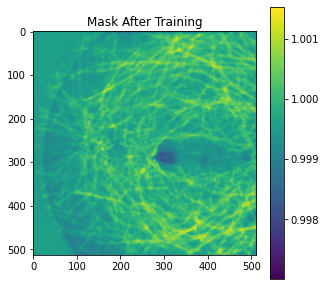

In [0]:
#Plot trained illumination phase input
print(mask)
plt.figure(figsize=(5,5))
# plt.subplot(2,2,1)
plt.imshow(np.abs(mask))
plt.colorbar()
plt.title('Mask After Training')

(512, 512)


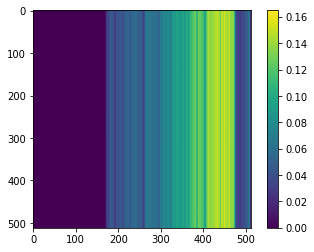

In [0]:
x_train_plt = x_train[0,:,:,0]
print(x_train_plt.shape)
plt_img_mask = tf.multiply(mask,x_train_plt[1])
plt.imshow(abs(plt_img_mask))
plt.colorbar()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


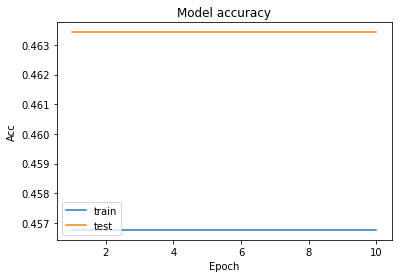

In [0]:
index = np.linspace(1, 10, num=10)
print(index)

plt.plot(index,h_train)
plt.plot(index,h_test)
plt.title("Mean Intersection over Union")
plt.ylabel("IoU")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="lower left")
plt.show()

plt.plot(index,h_train_loss)
plt.plot(index,h_test_loss)
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="lower left")
plt.show()